ASSIGNMENT 8 A

DATE: 3/09/24

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('heart_cleveland_upload.csv')
print(df.dtypes)
df.tail()

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
df['target'] = df['condition'].apply(lambda x: 1 if x > 0 else 0)
df.drop('condition', axis=1, inplace=True)

df.replace('?', np.nan, inplace=True)
mean_ca = df['ca'].mean()
df['ca'].fillna(mean_ca, inplace=True)

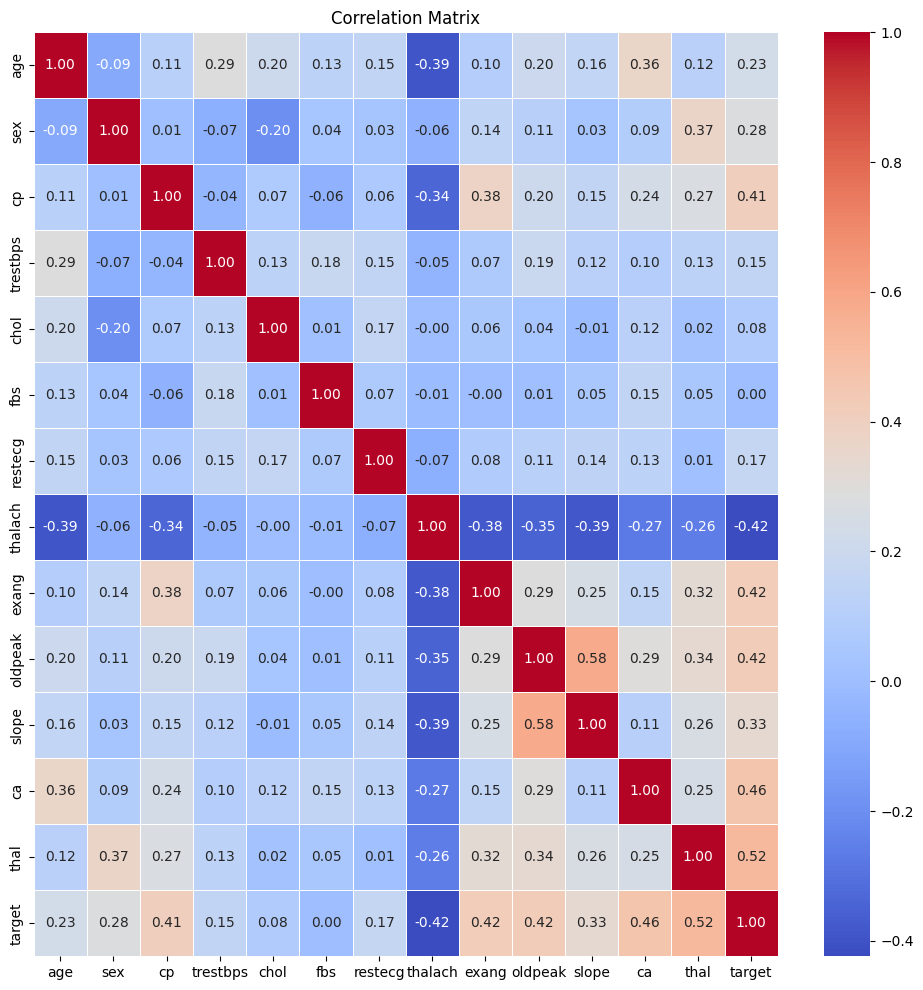

In [19]:
corrmatrix = df.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Data splitting
X = df.drop('target', axis=1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7333333333333333


In [27]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(class_report)

Confusion Matrix:
[[23  9]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [38]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# RandomizedSearchCV
distributions = dict(C=uniform(loc=0, scale=4))
rand_search= RandomizedSearchCV(LogisticRegression(), distributions, random_state=0, n_iter=50)
rand_search.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Score: {rand_search.best_score_:.2f}")

# GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, verbose=0)
grid_search.fit(X_train, y_train)
print(f"GridSearchCV Best Score: {grid_search.best_score_:.2f}")

RandomizedSearchCV Best Score: 0.87
GridSearchCV Best Score: 0.87
